In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_labels = ["A", "T", "W", "X", "Y"]
full_data = {}
for char in data_labels:
    with open(f'{char}.pickle', 'rb') as f:
        data = np.load(f, allow_pickle=True)
        data["data"] = np.array(data["data"])
        full_data[char] = data
        print(f"data shape for {char} : {data['data'].shape}")

data shape for A : (76, 12, 2)
data shape for T : (74, 12, 2)
data shape for W : (76, 12, 2)
data shape for X : (81, 12, 2)
data shape for Y : (56, 12, 2)


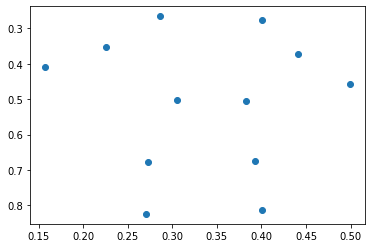

In [3]:
char  = "A"
idx = 12

x = full_data[char]['data'][idx][:, 0]
y = full_data[char]['data'][idx][:, 1]
scatter = plt.scatter(x, y)
ax = scatter.axes
ax.invert_yaxis()


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2021-12-10 16:29:33.690347: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [5]:
X = []
y = []
keys = full_data.keys()
for label, key in enumerate(keys):
    data = full_data[key]["data"]
    for row in data:
        X.append(row.ravel())
        y.append(label)

X = np.array(X)
y = np.array(y)
y = to_categorical(y)

print(X.shape)
print(y.shape)

input_shape = X.ravel().shape
num_classes = y.shape[1]

(363, 24)
(363, 5)


In [6]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)

In [7]:
model = Sequential([
    Dense(20, input_shape=(24,), activation="relu"),
    Dense(14, activation="relu"),
    Dense(num_classes, activation="softmax"),
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
    );

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                500       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                294       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 75        
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


2021-12-10 16:29:35.428842: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-12-10 16:29:35.452012: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-12-10 16:29:35.452045: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: MohammadRezaei
2021-12-10 16:29:35.452053: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: MohammadRezaei
2021-12-10 16:29:35.452147: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 465.19.1
2021-12-10 16:29:35.452174: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 465.19.1
2021-12-10 16:29:35.452181: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 465.19.1
2021-12-10 16:29:35.453198: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [8]:
model.fit(xtrain, ytrain, epochs=150, shuffle=True, batch_size = 16)

2021-12-10 16:29:35.554915: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-10 16:29:35.571823: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


Epoch 1/150
19/19 [==============================] - 0s 870us/step - loss: 1.6244 - accuracy: 0.2034
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.5894 - accuracy: 0.2103
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.5804 - accuracy: 0.2241
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 1.5742 - accuracy: 0.2414
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 1.5686 - accuracy: 0.2517
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 1.5624 - accuracy: 0.2793
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 1.5571 - accuracy: 0.2379
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 1.5489 - accuracy: 0.3034
Epoch 9/150
19/19 [==============================] - 0s 2ms/step - loss: 1.5427 - accuracy: 0.3000
Epoch 10/150
19/19 [==============================] - 0s 2ms/step - loss: 1.5350 - accuracy: 0.4034
Epoch 1

In [9]:
model.evaluate(xtest, ytest)

3/3 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 1.0000


[0.0809178426861763, 1.0]

/home/mohammad/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

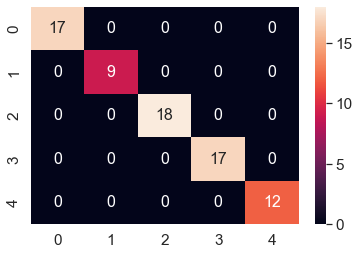

In [10]:
# from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_true = list(map(np.argmax, ytest))
y_pred = model.predict_classes(xtest);

cm = confusion_matrix(y_true, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size



In [11]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('../classify_model.tflite', 'wb') as f:
  f.write(tflite_model)

2021-12-10 16:29:40.916072: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpspwd5mu7/assets


2021-12-10 16:29:41.342791: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-12-10 16:29:41.342898: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-12-10 16:29:41.344211: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.007ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2021-12-10 16:29:41.371306: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-12-10 16:29:41.371336: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
2021-12-10 16:29:41.373765: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:210] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
